In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
%matplotlib inline


In [2]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [6]:
dir(digits) #to get the name of the columns of the dataset and see kind of information

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [7]:
digits.data[0] #getting the data for the first element

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

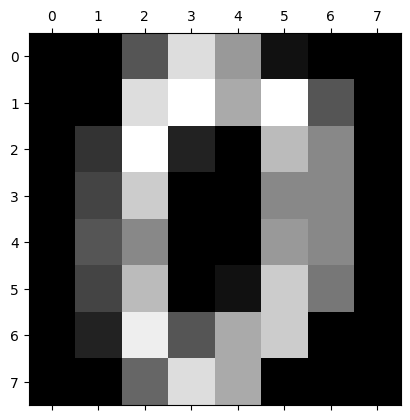

In [8]:
plt.gray() #showing the image of the first digit
plt.matshow(digits.images[0])

In [9]:
digits.target[0:5] #first five targets

array([0, 1, 2, 3, 4])

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size= 0.2)
# digits.data: dataset (characteristics)
# digits.target: target variable

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [13]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
model.score(X_test, y_test)

0.9666666666666667

In [15]:
model.predict([digits.data[0]])

array([0])

In [16]:
model.predict_proba([digits.data[0]])

array([[9.99999967e-01, 2.47824120e-17, 2.56405960e-12, 1.07705170e-11,
        2.06158668e-12, 1.93679010e-08, 8.92497242e-10, 7.26054774e-11,
        1.16995332e-08, 6.86474958e-10]])

In [19]:
#Confusion matrix
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[45,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 51,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  1,  0, 43,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  1,  1],
       [ 0,  1,  1,  0,  1,  0,  0,  0, 48,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  4, 48]])

Text(95.72222222222221, 0.5, 'Truth')

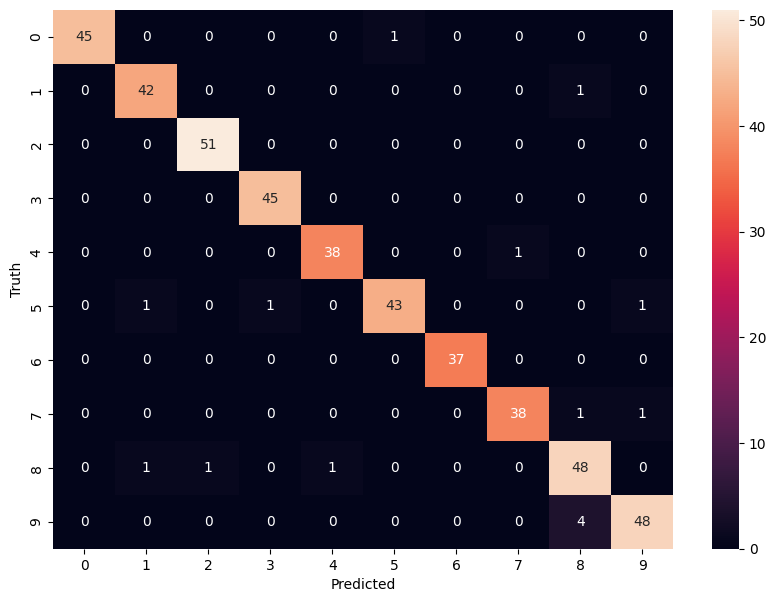

In [20]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
# the CM shows in the main diagonal the corrects predictions (matching values between truth and predicted values)